## E-Sun Credit Card Fraud Detection task
- competition end at 12/30

- <a href="https://tbrain.trendmicro.com.tw/Competitions/Details/8">Website</a>

- include all Exploratory in this notebook

### Column description

In [2]:
from IPython.display import IFrame
IFrame("dataset_description.pdf", width=600, height=300)

In [3]:
# import modules
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_raw = pd.read_csv('train.csv')

In [5]:
N, N_f = train_raw.shape #1521787, 23

In [6]:
train_raw.sample(5)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
3298,6581,152634,12873,655.22,5,62,N,4,N,N,...,0,10,165619.0,253,5302,N,5812,102,0,910135
1297535,6769,25710,61760,459.81,5,62,N,5,N,N,...,0,76,134945.0,251,78019,N,3294,102,0,92504
1322619,6769,9584,90008,671.04,4,62,N,2,N,N,...,0,76,85210.0,343,78638,N,5817,102,0,409176
123322,6716,90474,72553,275.39,5,62,N,5,N,N,...,0,12,192901.0,292,50721,N,3281,102,0,1340807
163152,6032,33396,160544,881.18,5,62,Y,2,N,Y,...,0,30,192655.0,373,79200,N,5817,102,0,196029


In [10]:
# transter Y/N to 1/0
def to_dummy(i):
    d = {'Y':1, 'y':1, 'N':0,'n':0}
    try:
        return d[i]
    except:
        return i


isObjCol = train_raw.dtypes=='object'
isObjCol = isObjCol[isObjCol==True].index
if len(isObjCol) >0:
    train_raw[isObjCol] = train_raw.select_dtypes(['object']).applymap(lambda x:to_dummy(x))
    #train_raw.select_dtypes(['object']).isnull().sum()


In [12]:
train_raw.describe()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,...,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
count,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.509206e+06,1.509206e+06,...,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06,1.521787e+06
mean,6.008003e+03,8.209027e+04,1.089170e+05,6.547219e+02,4.829368e+00,5.383324e+01,2.544870e-01,4.149114e+00,3.361370e-03,4.263103e-02,...,4.962784e-02,4.532732e+01,1.463152e+05,2.978089e+02,5.589022e+04,1.330738e-02,4.755128e+03,9.565116e+01,2.485499e-02,9.711265e+05
std,1.502420e+03,4.736249e+04,6.090363e+04,4.028078e+02,6.513408e-01,2.072135e+01,4.355726e-01,2.394259e+00,5.787982e-02,2.020239e-01,...,3.652493e-01,2.601889e+01,5.212107e+04,7.796778e+01,3.082297e+04,1.145875e-01,1.979815e+03,1.890027e+01,2.216804e-01,5.641322e+05
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.140300e+04,5.763500e+04,4.370600e+02,5.000000e+00,6.200000e+01,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.300000e+01,1.109310e+05,2.500000e+02,3.377400e+04,0.000000e+00,3.795000e+03,1.020000e+02,0.000000e+00,4.869475e+05
50%,6.716000e+03,8.191200e+04,1.097850e+05,5.919000e+02,5.000000e+00,6.200000e+01,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.500000e+01,1.515220e+05,2.640000e+02,5.936000e+04,0.000000e+00,5.817000e+03,1.020000e+02,0.000000e+00,9.795800e+05
75%,6.769000e+03,1.230590e+05,1.618760e+05,8.073400e+02,5.000000e+00,6.200000e+01,1.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,6.800000e+01,1.858270e+05,3.430000e+02,7.920000e+04,0.000000e+00,5.817000e+03,1.020000e+02,0.000000e+00,1.455200e+06
max,6.884000e+03,1.638840e+05,2.133340e+05,7.208770e+03,6.000000e+00,7.500000e+01,1.000000e+00,1.000000e+01,1.000000e+00,1.000000e+00,...,8.000000e+00,9.000000e+01,2.359590e+05,4.590000e+02,1.033070e+05,1.000000e+00,6.671000e+03,1.070000e+02,4.000000e+00,1.958239e+06


### describe of txn number and avg_txn_amt
- avg txn number about ``12`` within 90 days
- avg txn amount for txn abount ``NTD730``


In [13]:
txn_num_ByAc = train_raw.groupby(['bacno','cano']).agg({'txkey':'count', 'conam':'mean'})
pd.set_option('precision', 2)
txn_num_ByAc.describe()

,txkey,conam
count,129413.00,129413.00
mean,11.76,730.77
std,15.91,367.18
min,1.00,0.00
25%,3.00,513.80
50%,7.00,662.07
75%,15.00,844.82
max,1117.00,6728.97


### Note
fraud/non-fraud: 1501432/20355 about 74:1

--> acc = <b>0.9864</b> if guess all non_fraud

In [14]:
fraud = train_raw.fraud_ind == 1
non_fraud = train_raw.fraud_ind == 0
train_raw.groupby(['fraud_ind']).agg({'txkey':'count'})

,txkey
fraud_ind,
0,1501432
1,20355


(array([571.,   5., 347.,  31.,  60.,  47.,  50.,  76.,  72.,  56.,  91.,
         72.,  57.,  90., 122.,  86., 109., 122., 104.,  59., 140.,  79.,
         45.,  44., 375.,  78., 470.,  35.,  19.,  21.,  28.,  22.,  18.,
         20.,  11.,  22.,  19.,  19.,  19.,  18.,  22.,  18.,  20.,  30.,
         10.,  17.,  18.,  15.,  18.,  12.,  17.,  14.,  18.,  18.,  20.,
         20.,  13.,   9.,   6.,   7.,   6.,  11.,   6.,   5.,   0.,   3.,
          2.,   1.,   7.,   3.,   1.,   1.,   1.,   0.,   3.]),
 array([   0.    ,   38.6596,   77.3192,  115.9788,  154.6384,  193.298 ,
         231.9576,  270.6172,  309.2768,  347.9364,  386.596 ,  425.2556,
         463.9152,  502.5748,  541.2344,  579.894 ,  618.5536,  657.2132,
         695.8728,  734.5324,  773.192 ,  811.8516,  850.5112,  889.1708,
         927.8304,  966.49  , 1005.1496, 1043.8092, 1082.4688, 1121.1284,
        1159.788 , 1198.4476, 1237.1072, 1275.7668, 1314.4264, 1353.086 ,
        1391.7456, 1430.4052, 1469.0648, 1507.72

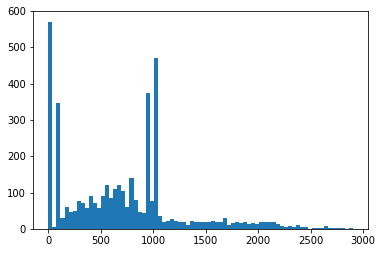

In [15]:
sample = train_raw.sample(round(N/5))
plt.hist(sample['conam'][sample['fraud_ind']==1], bins=75)
#plt.hist(sample['conam'][sample['fraud_ind']==0], bins=50)
# either 100 or 1000 why ?????

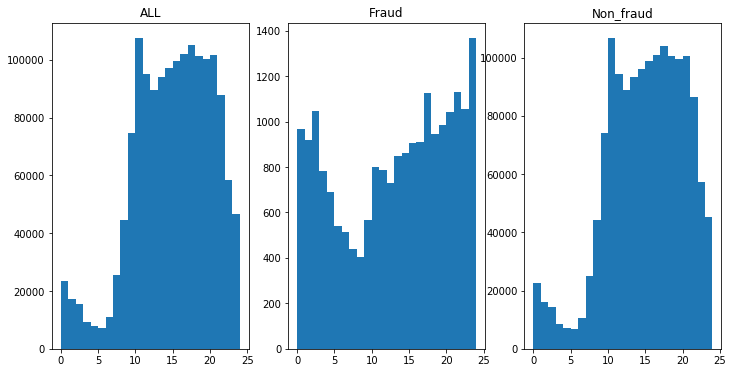

In [16]:
# txn time by all, fraud, non fraud
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (12,6))

axes[0].hist((train_raw.loctm/10000).round().map(int), bins=24)
axes[0].title.set_text('ALL')
axes[1].hist((train_raw.loctm[fraud]/10000).round().map(int), bins=24)
axes[1].title.set_text('Fraud')
axes[2].hist((train_raw.loctm[non_fraud]/10000).round().map(int), bins=24)
axes[2].title.set_text('Non_fraud')
plt.show()

### feature correlation


Text(0.5,1,'Heatmap of Correlation')

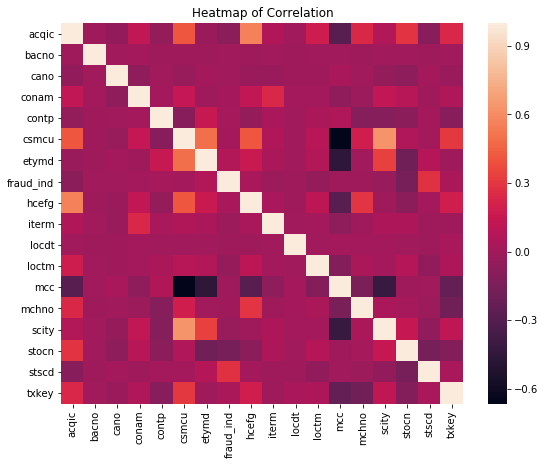

In [7]:
corr = train_raw.corr()
plt.figure(figsize=(9,7))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [8]:
corr['fraud_ind'].sort_values()

stocn       -0.161405
acqic       -0.083684
loctm       -0.042688
scity       -0.028715
iterm       -0.014662
mchno       -0.012187
locdt       -0.011773
mcc         -0.002827
bacno        0.000285
cano         0.004608
csmcu        0.013472
conam        0.016634
contp        0.023248
hcefg        0.026210
txkey        0.034034
etymd        0.067743
stscd        0.279225
fraud_ind    1.000000
Name: fraud_ind, dtype: float64

#### fraud_ind have some corr with stscd?

狀態碼??

In [18]:
train_raw.groupby(['stscd','fraud_ind']).agg({'txkey':'count'})

txkey
stscd fraud_ind         
0     0          1488066
      1            14679
1     0              383
      1               25
2     0            12855
      1             5651
3     0              108
4     0               20